In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
#import scikit-learn

NB_DIR = os.getcwd()
PROJECT_ROOT = os.path.dirname(NB_DIR)

RAW_DATA_DIR = os.path.join(PROJECT_ROOT, 'data', 'raw')
os.makedirs(RAW_DATA_DIR, exist_ok=True)

xls_path = os.path.join(RAW_DATA_DIR, 'soil-liquefaction.xlsx')




x = np.arange(0,6,1)
y=  [0,0,1,1,1,1]
x

were tryna do logsitic reg -> probability

In [ ]:
df = pd.read_excel(xls_path)

df.rename(columns = {
  'Mw': 'moment_magnitude',
  'R (km)': 'epicentral_distance',
  't (s)': 'duration',
  'PGA': 'peak_ground_acceleration',
  'FC (%)': 'fines_content',
  'GC (%)': 'gravel_content',
  'D50 (mm)': 'median_grain_size',
  'N\'120': 'dpt_blow_count',
  'Vs1 (m/s)': 'shear_wave_velocity',
  'σ\'v (kPa)': 'effective_stress',
  'Dw (m)': 'depth_to_water_table',
  'Ds (m)': 'depth_to_soil_layer',
  'Hn (m)': 'thickness_of_capping_layer',
  'Dn (m)': 'capping_layer_to_ground_water',
  'rd': 'stress_reduction_coefficient',
  'CSR7.5': 'normalized_csr',
  'Liqefied ？': 'liquefied'
}, inplace = True)

df.drop(columns = [
  'Case No.',
  'Date',
  'Earthquake Name',
  'Site location & Borehole name',
  'MSF',
  'CSR',
  'Reference'
], inplace = True)

df['liquefied'] = (
    df['liquefied']
    .astype(str).str.strip().str.lower()
    .map({'yes': True, 'no': False})
)

#df.sample(4)
df.info()

# need to fill the na values 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   moment_magnitude               234 non-null    float64
 1   epicentral_distance            225 non-null    float64
 2   duration                       229 non-null    float64
 3   peak_ground_acceleration       234 non-null    float64
 4   fines_content                  195 non-null    float64
 5   gravel_content                 208 non-null    float64
 6   median_grain_size              209 non-null    float64
 7   dpt_blow_count                 234 non-null    float64
 8   shear_wave_velocity            234 non-null    float64
 9   effective_stress               234 non-null    float64
 10  depth_to_water_table           234 non-null    float64
 11  depth_to_soil_layer            234 non-null    float64
 12  thickness_of_capping_layer     156 non-null    flo

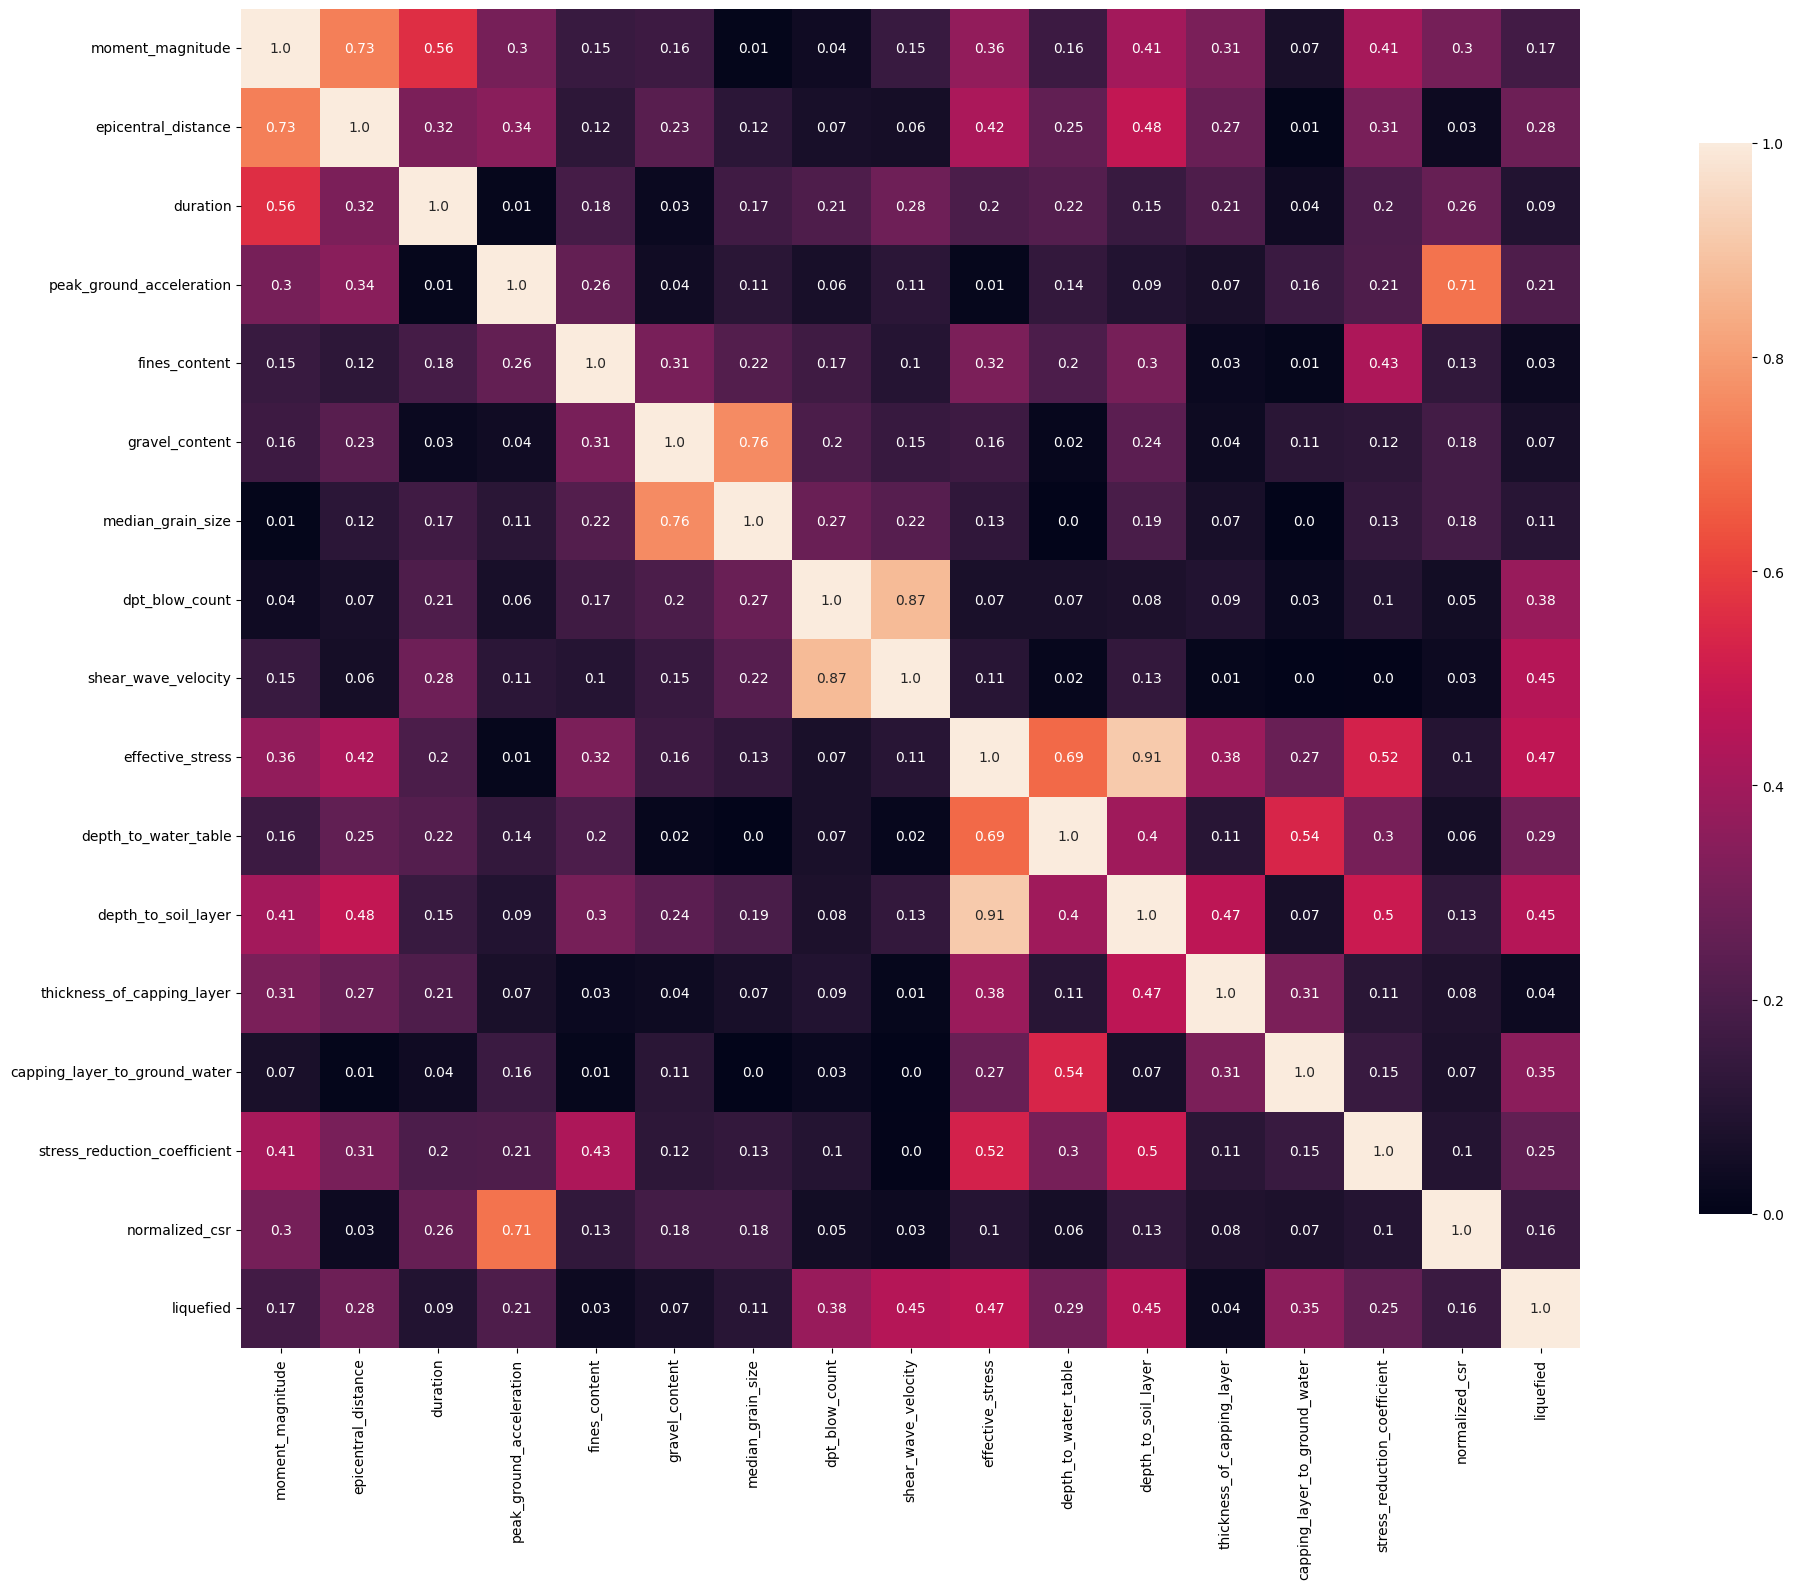

In [30]:
threshold =  0.75
r = df.corr(numeric_only=True, method='pearson')
abs_r = np.abs(r)

mask = mask = np.tril(np.ones_like(abs_r, dtype=bool))
annot_values = abs_r.where(abs_r >= threshold).round(2).fillna("")

#sns.heatmap(abs_r, mask = mask, fmt="", annot=annot_values, vmin=0, vmax=1,
      #      square=True, cbar_kws={'shrink': 0.8})

fig, ax = plt.subplots(figsize=(24, 16))
sns.heatmap(abs_r, fmt="", annot=abs_r.round(2), vmin=0, vmax=1,
            square=True, cbar_kws={'shrink': 0.8})
plt.tight_layout()

In [ ]:
for i in range(len(y_test)):
    fault = 0
    if y_test[i] != y_train[i]:
        fault+=1


